# **<span style="color:red">Imports</span>**

In [1]:
# Handy arrays
import numpy as np

# FFTs
import scipy.fft as fft
import scipy.fftpack as fftp

# Custom modules
import lib.utils.utils as Utils
import lib.utils.plotting as Plotting
import lib.utils.otf as OTF
import lib.methods.tikhonov_rgb as Restoration
import lib.mag.sample_presets as SamplePresets
import lib.scripts as Scripts

# <span style="color:red">**Reconstruction of real samples**</span>

## <span style="color:orange">**Samples init**</span>

### <span>**Samples**</span>

In [2]:
image = Utils.image_load('Samples/Mag/.IMG_0003_1.png', mode='rgb')
image_orig = Utils.image_load('Samples/Mag/.IMG_0002_1.png', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10.8/11, 10, mode='square')
sample_preset_1 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func), Utils.rgb_mul_mono(image_orig, window_func),
                                             'Results_(Mag)/Sample_1/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0008, 0.04, 0.0008).astype(np.float64), np.arange(305, 405, 2).astype(np.float64),
                                             0.004, 505,
                                             [0.5, 1.3], 54, 100)

In [3]:
image = Utils.image_load('Samples/Mag/.IMG_0004_1.png', mode='rgb')
image_orig = Utils.image_load('Samples/Mag/.IMG_0002_1.png', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10.8/11, 10, mode='square')
sample_preset_2 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func), Utils.rgb_mul_mono(image_orig, window_func),
                                             'Results_(Mag)/Sample_2/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0008, 0.04, 0.0008).astype(np.float64), np.arange(305, 405, 2).astype(np.float64),
                                             0.0025, 420,
                                             [0.5, 1.3], 165, 200)

In [11]:
image = Utils.image_load('Samples/Mag/IMG_0048.png', mode='rgb')
image_orig = Utils.image_load('Samples/Mag/IMG_0013.png', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10.8/11, 10, mode='square')
sample_preset_3 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func), Utils.rgb_mul_mono(image_orig, window_func),
                                             'Results_(Mag)/Sample_3/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0008, 0.04, 0.0008).astype(np.float64), np.arange(305, 405, 2).astype(np.float64),
                                             0.004, 505,
                                             [0.15, 0.3], 16, 40)

In [5]:
image = Utils.image_load('Samples/Mag/IMG_0052.png', mode='rgb')
image_orig = Utils.image_load('Samples/Mag/IMG_0051.png', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10.8/11, 10, mode='square')
sample_preset_4 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func), Utils.rgb_mul_mono(image_orig, window_func),
                                             'Results_(Mag)/Sample_4/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0014, 0.07, 0.0014).astype(np.float64), np.arange(375, 475, 2).astype(np.float64),
                                             0.0209, 425,
                                             [0.5, 2.5], 162, 200)

In [6]:
image = Utils.image_load('Samples/Mag/IMG_0049.png', mode='rgb')
image_orig = Utils.image_load('Samples/Mag/IMG_0050.png', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10.8/11, 10, mode='square')
Y,X = Utils.create_matrix_grid_coordinates(image.shape[0:2])
sample_preset_5 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func), Utils.rgb_mul_mono(image_orig, window_func),
                                             'Results_(Mag)/Sample_5/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0008, 0.04, 0.0008).astype(np.float64), np.arange(305, 405, 2).astype(np.float64),
                                             0.077, 495,
                                             [0.5, 0.8], 50, 100)

In [12]:
# Sample choice
selected_sample = sample_preset_3

In [43]:
otf_batch = OTF.create_otf_batch((2048,2048), selected_sample.image_rgb_ratios,
                                 selected_sample.detector_funcs, 0.05, 700)

In [45]:
for i in range(otf_batch.shape[0]):
    for j in range(otf_batch.shape[1]):
        otf_batch[i,j,:,:] = fftp.fftshift(otf_batch[i,j,:,:])

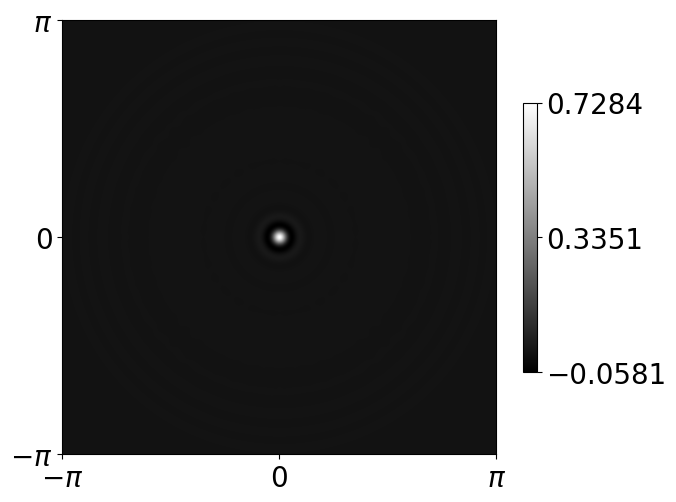

In [53]:
Plotting.plot_image(otf_batch[1,2,:,:].real)

In [46]:
min_eigvals = np.empty(1024)
max_eigvals = np.empty(1024)
for i in range(min_eigvals.shape[0]):
    eigvals = np.linalg.eig(otf_batch[:,:,1024, 1024 + i])[0]
    eigvals = np.abs(eigvals)
    min_eigvals[i] = np.min(eigvals)
    max_eigvals[i] = np.max(eigvals)

In [52]:
i=1024
print(otf_batch[:,:,1024, i])
print(np.linalg.eig(otf_batch[:,:,1024, i])[0])
print(np.abs(np.linalg.eig(otf_batch[:,:,1024, i])[0]))

[[0.4780426 +0.j 0.58337402+0.j 0.59687805+0.j]
 [0.58337402+0.j 0.71191406+0.j 0.72839355+0.j]
 [0.59687805+0.j 0.72839355+0.j 0.74525452+0.j]]
[-9.63387366e-17+0.j  1.93521118e+00+0.j  1.21270390e-16+0.j]
[9.63387366e-17 1.93521118e+00 1.21270390e-16]


In [38]:
np.abs(1.27899070e-03+4.58419398e-18j)

0.0012789907

In [54]:
np.unique(min_eigvals)

array([9.63387366e-17, 6.29628403e-11, 2.52261911e-10, ...,
       1.54688320e-02, 1.54721738e-02, 1.55228739e-02])

In [47]:
np.unique(max_eigvals)

array([4.68340289e-06, 1.52687312e-04, 2.99609695e-04, ...,
       1.92355300e+00, 1.93108301e+00, 1.93521118e+00])

In [49]:
np.min(min_eigvals)

9.633873656244065e-17

In [50]:
np.argmin(min_eigvals)

0

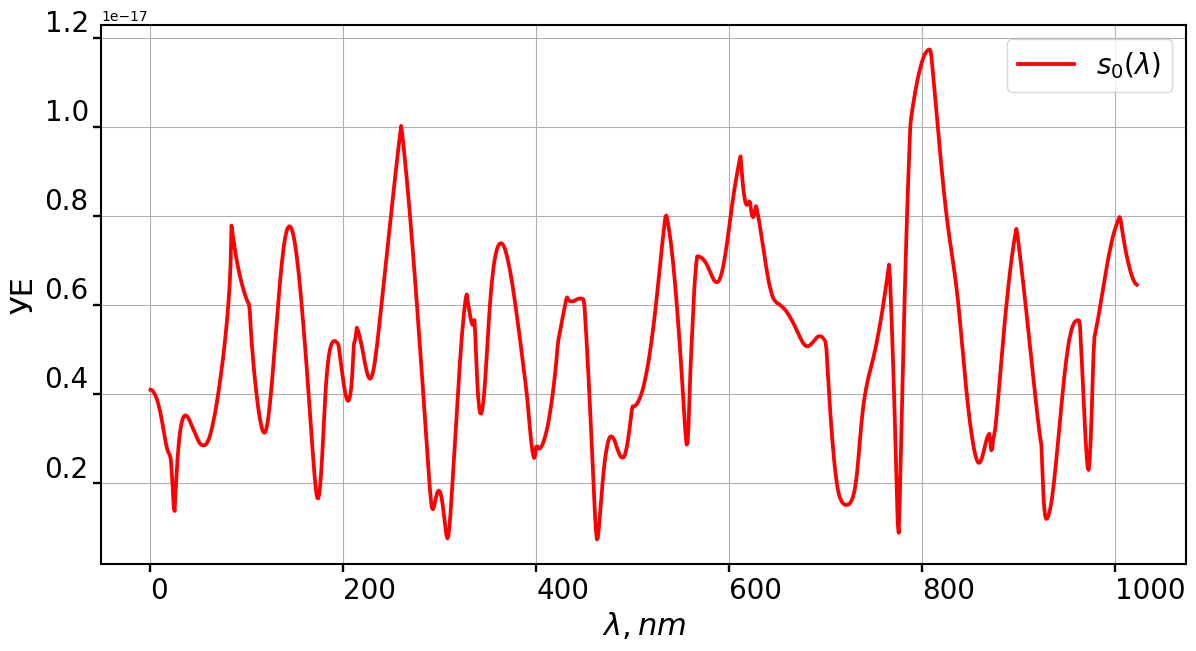

In [21]:
Plotting.plot_functions([Plotting.FuncDesc(np.arange(0,1024), min_eigvals, r'$s_{0}(\lambda)$', 'r')],
                        x_axis_name=r'$\lambda, nm$')

### <span>**Detector Functions**</span>

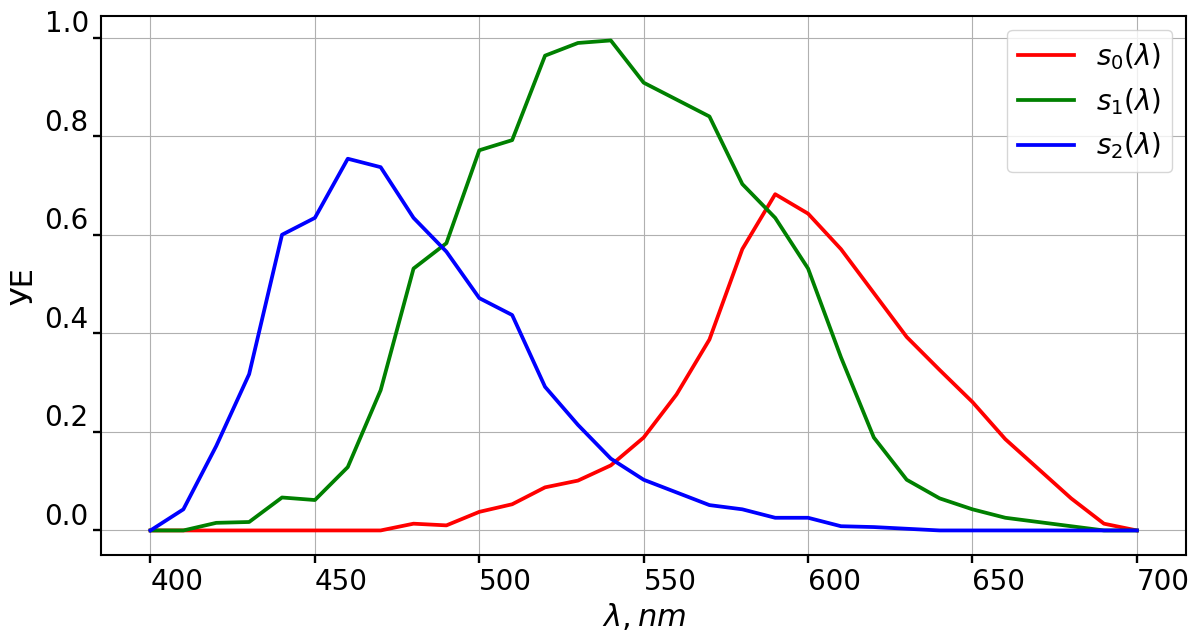

In [16]:
Plotting.plot_functions([Plotting.FuncDesc(selected_sample.detector_funcs[0], selected_sample.detector_funcs[1], r'$s_{0}(\lambda)$', 'r'),
                         Plotting.FuncDesc(selected_sample.detector_funcs[0], selected_sample.detector_funcs[2], r'$s_{1}(\lambda)$', 'g'),
                         Plotting.FuncDesc(selected_sample.detector_funcs[0], selected_sample.detector_funcs[3], r'$s_{2}(\lambda)$', 'b')],
                        x_axis_name=r'$\lambda, nm$', plot_file=selected_sample.sample_folder + '2-1.svg')

### <span>**Image**</span>

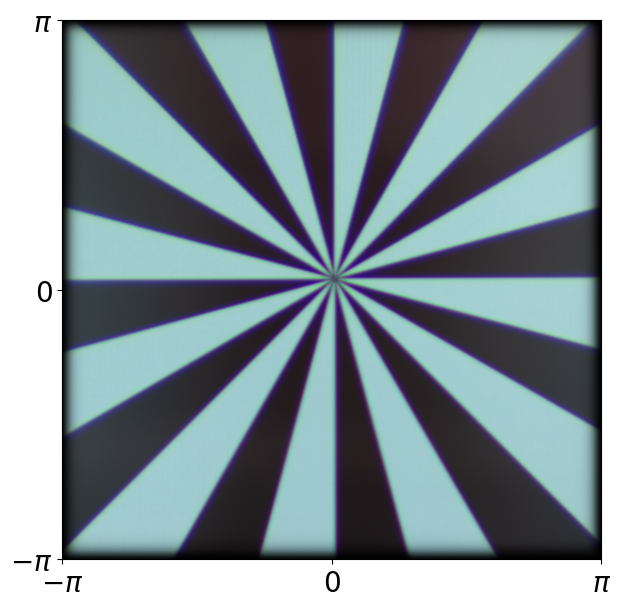

In [6]:
Plotting.plot_image(selected_sample.image_orig)

In [11]:
Utils.image_save(Utils.image_crop_corners(selected_sample.image_orig), selected_sample.sample_folder + '1, original.png', mode='rgb')

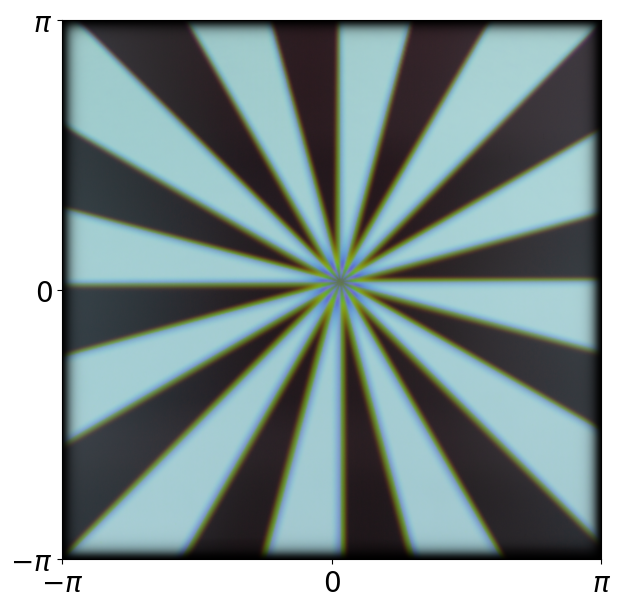

In [7]:
Plotting.plot_image(selected_sample.image)

In [ ]:
Utils.image_save(Utils.image_crop_corners(selected_sample.image), selected_sample.sample_folder + '3, observed.png', mode='rgb')

## **<span style="color:orange">Defocus parameters restoration</span>**

In [ ]:
#fn_v = Scripts.estimate_defocus_param_rgb(selected_sample.image,
#                                          selected_sample.average_angled_spectrum_k, selected_sample.average_angled_spectrum_b,
#                                          selected_sample.zeros_range_ratio,
#                                          selected_sample.image_rgb_ratios, selected_sample.detector_funcs,
#                                          a=selected_sample.defocus_a_grid, wlength0=selected_sample.focus_wlength_grid,
#                                          plot_folder=selected_sample.sample_folder)

## <span style="color:orange">**OTF batch**</span>

In [4]:
otf_batch = OTF.create_otf_batch(selected_sample.image.shape[0:2], selected_sample.image_rgb_ratios,
                                 selected_sample.detector_funcs, selected_sample.defocus_a, selected_sample.focus_wlength)

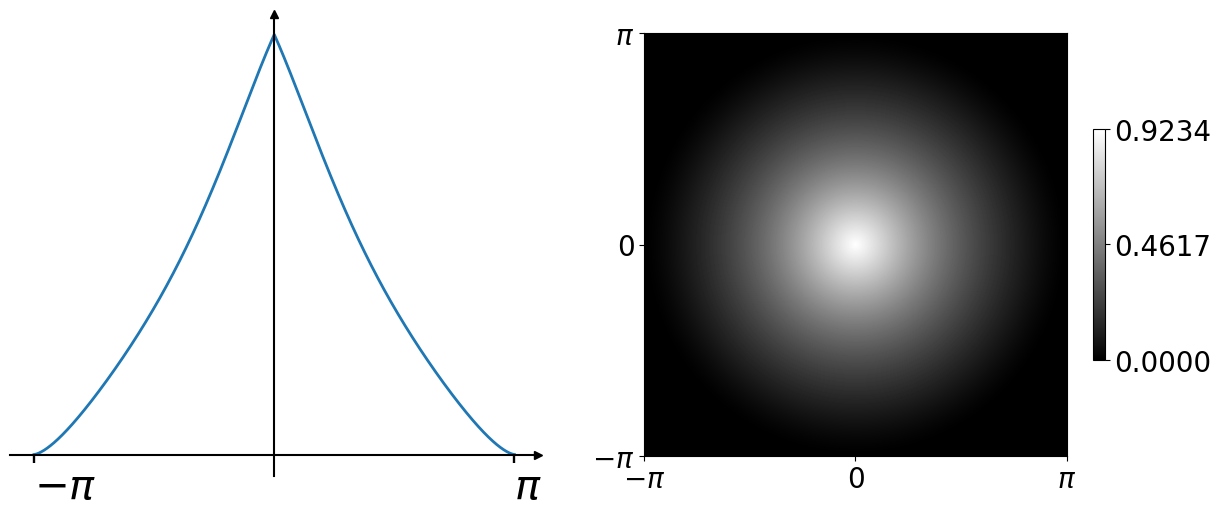

In [19]:
Plotting.plot_image(fftp.fftshift(otf_batch[0,0,:,:].real), plot_cut=True, cut_index=selected_sample.image.shape[0]//2, y_axis_position=-0.5)#,
                    #plot_file=selected_sample.sample_folder + '2-2.svg')

## **<span style="color:orange">Image restoration</span>**

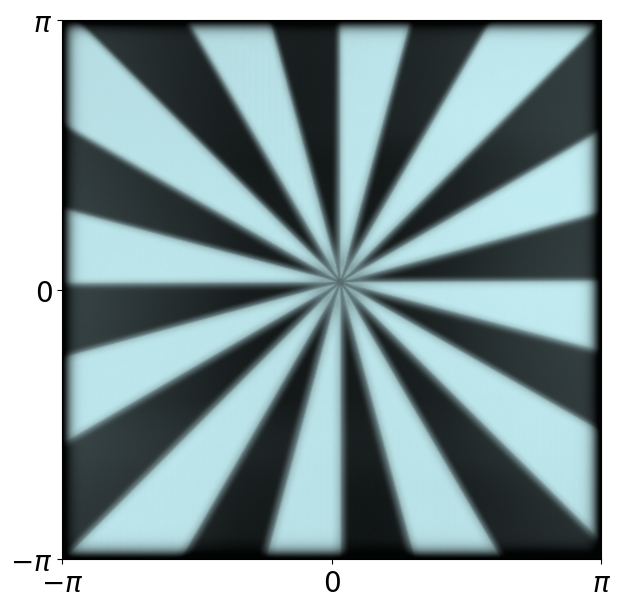

In [13]:
image_restored, nev_norm = Restoration.tikhonov_regularization_method_rgb(selected_sample.image, otf_batch, selected_sample.mu, selected_sample.k0)
Plotting.plot_image(image_restored)

In [14]:
Utils.image_save(Utils.image_crop_corners(image_restored), selected_sample.sample_folder + '5, restored.png', mode='rgb')

## **<span style="color:orange">Number of iterations</span>**

In [5]:
from lib.methods.otf_restoration import get_lower_envelope

In [6]:
iters = np.arange(1, selected_sample.max_iters + 1)

In [7]:
image_restored, nev_norm = Restoration.tikhonov_regularization_method_rgb(selected_sample.image, otf_batch, selected_sample.mu, -selected_sample.max_iters)

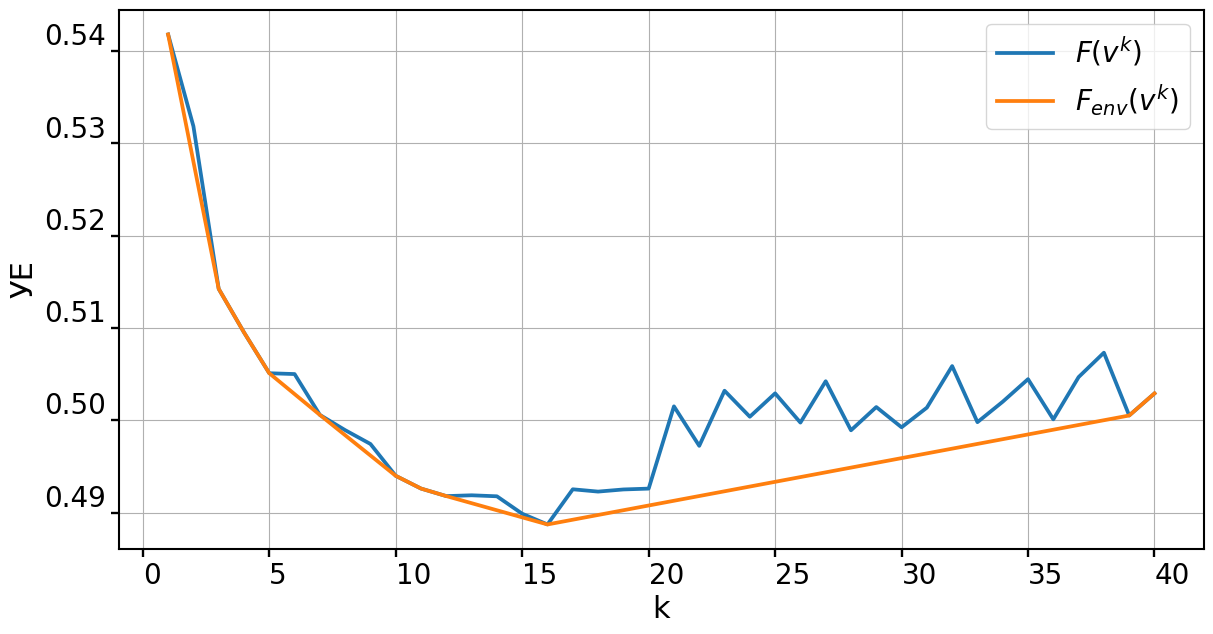

In [8]:
Plotting.plot_functions([Plotting.FuncDesc(iters, nev_norm, r'$F(v^{k})$'),
                         Plotting.FuncDesc(iters, get_lower_envelope(iters, nev_norm), r'$F_{env}(v^{k})$')], x_axis_name='k',
                         plot_file=selected_sample.sample_folder + 'iter_num.svg')

In [9]:
def minimise_functional(functional_values, segment_splitting):
    return segment_splitting[np.argmin(functional_values)]

In [10]:
min_iters = minimise_functional(get_lower_envelope(iters, nev_norm), iters)
print(min_iters)

16
